In [26]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.regularizers import l2

In [27]:
# Classes to be used
classes = ['football', 'formula 1 racing', 'nascar racing', 'baseball', 'hockey', 'basketball',
           'olympic wrestling', 'rugby', 'canoe slamon', 'roller derby', 'high jump',
           'rollerblade racing', 'field hockey', 'figure skating women', 'golf', 'polo',
           'rings', 'swimming', 'uneven bars', 'figure skating pairs']

# Load and preprocess the image
img_path = 'data/train/formula 1 racing/023.jpg'
image = Image.open(img_path).resize((180, 180))
image_array = np.array(image).astype(np.float32) / 255.0

In [28]:
# Model CNN 06
def build_model_1():
    inputs = Input(shape=(224, 224, 3))
    x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), name='conv1')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001), name='conv2')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001), name='conv3')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001), name='conv4')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001), name='conv5')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(1024, (3, 3), activation='relu', kernel_regularizer=l2(0.001), name='conv6')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(classes), activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Model CNN 06 03
def build_model_2():
    inputs = Input(shape=(180, 180, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same', name='conv1')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='conv4')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='conv5')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(1024, (3, 3), activation='relu', padding='same', name='conv6')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.005))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(classes), activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Model CNN 06 03 01
def build_model_3():
    inputs = Input(shape=(180, 180, 3))
    x = Conv2D(32, (3, 3), activation='relu', padding='same', strides=(1, 1), name='conv1')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

    x = Conv2D(64, (3, 3), activation='relu', padding='same', strides=(2, 2), name='conv2')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1), name='conv3')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', strides=(2, 2), name='conv4')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', strides=(1, 1), name='conv5')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

    x = Conv2D(1024, (3, 3), activation='relu', padding='same', strides=(1, 1), name='conv6')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu', kernel_regularizer=l2(0.005))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(len(classes), activation='softmax')(x)

    model = Model(inputs, outputs)
    return model


model_1 = build_model_1()
model_2 = build_model_2()
model_3 = build_model_3()

image_array_224 = np.array(image.resize((224, 224))).astype(np.float32) / 255.0

In [29]:
def get_conv_output(model, image, layer_name):
    intermediate_layer_model = Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    conv_output = intermediate_layer_model.predict(np.expand_dims(image, axis=0))
    return conv_output

# Get the convolution outputs of the third convolutional layer
layer_name='conv3'

output_1 = get_conv_output(model_1, image_array_224, layer_name)
output_2 = get_conv_output(model_2, image_array, layer_name)
output_3 = get_conv_output(model_3, image_array, layer_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


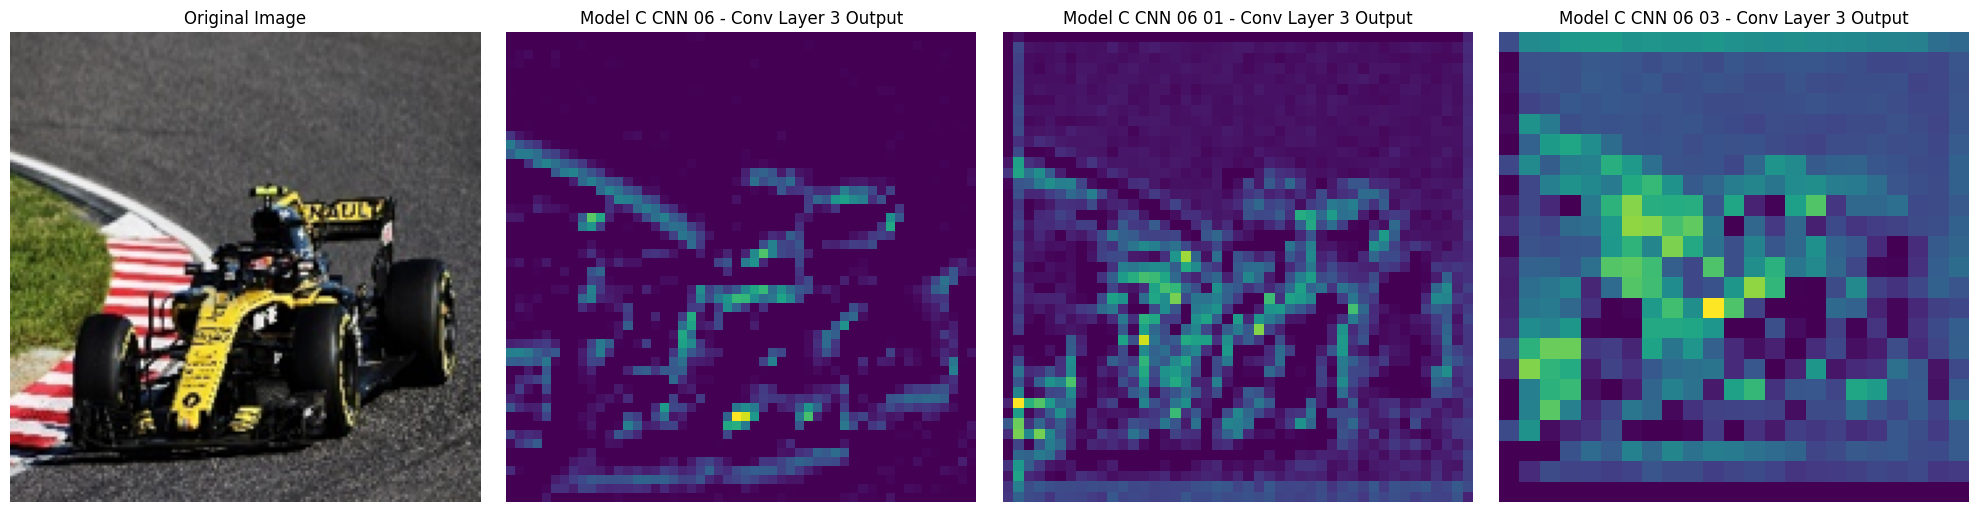

<Figure size 640x480 with 0 Axes>

In [31]:
# Visualize the results
def visualize_conv_output(conv_output, title, ax):
    # Select the first filter for visualization
    filter_output = conv_output[0, :, :, 0]
    ax.imshow(filter_output, cmap='viridis')
    ax.set_title(title)
    ax.axis('off')

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

visualize_conv_output(output_1, 'Model C CNN 06 - Conv Layer 3 Output', axs[1])
visualize_conv_output(output_2, 'Model C CNN 06 01 - Conv Layer 3 Output', axs[2])
visualize_conv_output(output_3, 'Model C CNN 06 03 - Conv Layer 3 Output', axs[3])

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()